# Collaboration and Competition

---

Congratulations for completing the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control agents in a more challenging environment, where the goal is to train a team of agents to play soccer.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Soccer.app"`
- **Windows** (x86): `"path/to/Soccer_Windows_x86/Soccer.exe"`
- **Windows** (x86_64): `"path/to/Soccer_Windows_x86_64/Soccer.exe"`
- **Linux** (x86): `"path/to/Soccer_Linux/Soccer.x86"`
- **Linux** (x86_64): `"path/to/Soccer_Linux/Soccer.x86_64"`
- **Linux** (x86, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86"`
- **Linux** (x86_64, headless): `"path/to/Soccer_Linux_NoVis/Soccer.x86_64"`

For instance, if you are using a Mac, then you downloaded `Soccer.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Soccer.app")
```

In [2]:
env = UnityEnvironment(file_name="Soccer_Linux/Soccer.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 2
        Number of External Brains : 2
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: GoalieBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Unity brain name: StrikerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 112
        Number of stacked Vector Observation: 3
        Vector Action space type: discrete
        Vector Action space size (per agent): 6
        Vector Action descriptions: , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we obtain separate brains for the striker and goalie agents.

In [3]:
# print the brain names
print(env.brain_names)

# set the goalie brain
g_brain_name = env.brain_names[0]
g_brain = env.brains[g_brain_name]

# set the striker brain
s_brain_name = env.brain_names[1]
s_brain = env.brains[s_brain_name]

['GoalieBrain', 'StrikerBrain']


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)

# number of agents 
num_g_agents = len(env_info[g_brain_name].agents)
print('Number of goalie agents:', num_g_agents)
num_s_agents = len(env_info[s_brain_name].agents)
print('Number of striker agents:', num_s_agents)

# number of actions
g_action_size = g_brain.vector_action_space_size
print('Number of goalie actions:', g_action_size)
s_action_size = s_brain.vector_action_space_size
print('Number of striker actions:', s_action_size)

# examine the state space 
g_states = env_info[g_brain_name].vector_observations
g_state_size = g_states.shape[1]
print('There are {} goalie agents. Each receives a state with length: {}'.format(g_states.shape[0], g_state_size))
s_states = env_info[s_brain_name].vector_observations
s_state_size = s_states.shape[1]
print('There are {} striker agents. Each receives a state with length: {}'.format(s_states.shape[0], s_state_size))

Number of goalie agents: 2
Number of striker agents: 2
Number of goalie actions: 4
Number of striker actions: 6
There are 2 goalie agents. Each receives a state with length: 336
There are 2 striker agents. Each receives a state with length: 336


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(2):                                         # play game for 2 episodes
#     env_info = env.reset(train_mode=False)                 # reset the environment    
#     g_states = env_info[g_brain_name].vector_observations  # get initial state (goalies)
#     s_states = env_info[s_brain_name].vector_observations  # get initial state (strikers)
#     g_scores = np.zeros(num_g_agents)                      # initialize the score (goalies)
#     s_scores = np.zeros(num_s_agents)                      # initialize the score (strikers)
#     while True:
#         # select actions and send to environment
#         g_actions = np.random.randint(g_action_size, size=num_g_agents)
#         s_actions = np.random.randint(s_action_size, size=num_s_agents)

#         actions = dict(zip([g_brain_name, s_brain_name], 
#                            [g_actions, s_actions]))
#         env_info = env.step(actions)                       
        
#         # get next states
#         g_next_states = env_info[g_brain_name].vector_observations         
#         s_next_states = env_info[s_brain_name].vector_observations
        
#         # get reward and update scores
#         g_rewards = env_info[g_brain_name].rewards  
#         s_rewards = env_info[s_brain_name].rewards
#         g_scores += g_rewards
#         s_scores += s_rewards
        
#         # check if episode finished
#         done = np.any(env_info[g_brain_name].local_done)  
        
#         # roll over states to next time step
#         g_states = g_next_states
#         s_states = s_next_states
        
#         # exit loop if episode finished
#         if done:                                           
#             break
#     print('Scores from episode {}: {} (goalies), {} (strikers)'.format(i+1, g_scores, s_scores))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
import matplotlib.pyplot as plt
from dqn_agent1 import Agent
from collections import deque

In [8]:
goalie0 = Agent(g_state_size,g_action_size,0)
goalie1 = Agent(g_state_size,g_action_size,0)
striker0 = Agent(s_state_size,s_action_size,0)
striker1 = Agent(s_state_size,s_action_size,0)


goalies = [goalie0,goalie1]
strikers = [striker0,striker1]
agents = [goalies,strikers]

In [9]:
def run(env, agents, num_episodes = 2000, eps=1.0,eps_decay=0.995,eps_min =0.01):
    g_scores = []
    g_average_scores = deque(maxlen=100)
    s_scores = []
    s_average_scores = deque(maxlen=100)

    steps = 0
    for i_episode in range(1, num_episodes+1):
        g_score = np.zeros(num_g_agents)
        s_score = np.zeros(num_s_agents)
        env_info = env.reset(train_mode = False)
        g_states = env_info[g_brain_name].vector_observations
        s_states = env_info[s_brain_name].vector_observations
        while True:
            g_actions = []
            for g_state, g_agent in zip(g_states,agents[0]):
                g_actions.append(g_agent.act(g_state, eps))
            s_actions = []
            for s_state, s_agent in zip(s_states,agents[1]):
                s_actions.append(s_agent.act(s_state, eps))
            
            actions = dict(zip([g_brain_name, s_brain_name],[g_actions, s_actions]))
            env_info = env.step(actions)

            g_next_states = env_info[g_brain_name].vector_observations
            s_next_states = env_info[s_brain_name].vector_observations

            g_rewards = env_info[g_brain_name].rewards
            s_rewards = env_info[s_brain_name].rewards

            g_score += g_rewards
            s_score += s_rewards

            g_dones = env_info[g_brain_name].local_done
            s_dones = g_dones

            for state, action, reward, next_state, done, agent in zip(g_states, g_actions, g_rewards, g_next_states, g_dones, agents[0]):
                agent.step(state, action, reward, next_state, done)

            for state, action, reward, next_state, done, agent in zip(s_states, s_actions, s_rewards, s_next_states, s_dones, agents[1]):
                agent.step(state, action, reward, next_state, done)
            
            g_states = g_next_states
            s_states = s_next_states
            steps += 1

            if np.any(g_dones):
                break
                
        eps = max(eps_min,eps*eps_decay)
        g_scores.append(max(g_score))
        s_scores.append(max(s_score))
        g_average_scores.append(max(g_score))
        s_average_scores.append(max(s_score))

        print('\rEpisode: {}\tGavg: {:.2f}\tSavg: {:.2f}\tTimeSteps: {}'.format(i_episode,np.mean(g_average_scores),np.mean(s_average_scores),steps))

        for agent_t,typ in zip(agents,['goalie','strika']):
            for i,agent in enumerate(agent_t):
                torch.save(agent.qnetwork_local.state_dict(),'weights/'+typ+str(i)+'.pth')
        
        if(np.mean(g_average_scores)>0.5 and np.mean(s_average_scores)>0.5):
            print('Environment Solved!')
            break

    return g_scores, s_scores


In [10]:
g_scores, s_scores = run(env,agents)

Episode: 1	Gavg: 0.84	Savg: 0.26	TimeSteps: 445
Episode: 2	Gavg: 0.92	Savg: -0.37	TimeSteps: 1046
Episode: 3	Gavg: 0.74	Savg: -0.00	TimeSteps: 1209
Episode: 4	Gavg: 0.80	Savg: -0.25	TimeSteps: 1810
Episode: 5	Gavg: 0.70	Savg: -0.04	TimeSteps: 1924
Episode: 6	Gavg: 0.65	Savg: 0.08	TimeSteps: 2103
Episode: 7	Gavg: 0.70	Savg: -0.07	TimeSteps: 2704
Episode: 8	Gavg: 0.72	Savg: -0.03	TimeSteps: 3134
Episode: 9	Gavg: 0.74	Savg: -0.00	TimeSteps: 3624
Episode: 10	Gavg: 0.69	Savg: 0.08	TimeSteps: 3704
Episode: 11	Gavg: 0.72	Savg: -0.02	TimeSteps: 4305
Episode: 12	Gavg: 0.74	Savg: -0.00	TimeSteps: 4825
Episode: 13	Gavg: 0.70	Savg: 0.06	TimeSteps: 4941
Episode: 14	Gavg: 0.72	Savg: 0.07	TimeSteps: 5411
Episode: 15	Gavg: 0.70	Savg: 0.11	TimeSteps: 5596
Episode: 16	Gavg: 0.71	Savg: 0.04	TimeSteps: 6197
Episode: 17	Gavg: 0.71	Savg: 0.07	TimeSteps: 6516
Episode: 18	Gavg: 0.68	Savg: 0.11	TimeSteps: 6596
Episode: 19	Gavg: 0.67	Savg: 0.14	TimeSteps: 6783
Episode: 20	Gavg: 0.66	Savg: 0.16	TimeSteps: 7069
E

Episode: 160	Gavg: 0.73	Savg: -0.05	TimeSteps: 62448
Episode: 161	Gavg: 0.72	Savg: -0.03	TimeSteps: 62471
Episode: 162	Gavg: 0.72	Savg: -0.01	TimeSteps: 62763
Episode: 163	Gavg: 0.71	Savg: -0.01	TimeSteps: 62794
Episode: 164	Gavg: 0.71	Savg: -0.01	TimeSteps: 62851
Episode: 165	Gavg: 0.71	Savg: -0.02	TimeSteps: 63452
Episode: 166	Gavg: 0.71	Savg: -0.01	TimeSteps: 63575
Episode: 167	Gavg: 0.71	Savg: -0.02	TimeSteps: 63762
Episode: 168	Gavg: 0.71	Savg: -0.00	TimeSteps: 64153
Episode: 169	Gavg: 0.71	Savg: -0.00	TimeSteps: 64469
Episode: 170	Gavg: 0.70	Savg: 0.02	TimeSteps: 64604
Episode: 171	Gavg: 0.69	Savg: 0.04	TimeSteps: 64628
Episode: 172	Gavg: 0.69	Savg: 0.04	TimeSteps: 65229
Episode: 173	Gavg: 0.69	Savg: 0.04	TimeSteps: 65830
Episode: 174	Gavg: 0.70	Savg: 0.02	TimeSteps: 66431
Episode: 175	Gavg: 0.69	Savg: 0.04	TimeSteps: 66470
Episode: 176	Gavg: 0.68	Savg: 0.05	TimeSteps: 66574
Episode: 177	Gavg: 0.68	Savg: 0.07	TimeSteps: 66981
Episode: 178	Gavg: 0.68	Savg: 0.05	TimeSteps: 67582
Ep

Episode: 316	Gavg: 0.72	Savg: -0.02	TimeSteps: 122439
Episode: 317	Gavg: 0.72	Savg: -0.03	TimeSteps: 123040
Episode: 318	Gavg: 0.73	Savg: -0.05	TimeSteps: 123641
Episode: 319	Gavg: 0.73	Savg: -0.04	TimeSteps: 123782
Episode: 320	Gavg: 0.73	Savg: -0.05	TimeSteps: 123962
Episode: 321	Gavg: 0.73	Savg: -0.03	TimeSteps: 124377
Episode: 322	Gavg: 0.73	Savg: -0.04	TimeSteps: 124611
Episode: 323	Gavg: 0.73	Savg: -0.05	TimeSteps: 125212
Episode: 324	Gavg: 0.73	Savg: -0.03	TimeSteps: 125445
Episode: 325	Gavg: 0.72	Savg: -0.03	TimeSteps: 125538
Episode: 326	Gavg: 0.73	Savg: -0.03	TimeSteps: 125971
Episode: 327	Gavg: 0.73	Savg: -0.04	TimeSteps: 126483
Episode: 328	Gavg: 0.73	Savg: -0.04	TimeSteps: 127084
Episode: 329	Gavg: 0.73	Savg: -0.05	TimeSteps: 127685
Episode: 330	Gavg: 0.74	Savg: -0.05	TimeSteps: 128109
Episode: 331	Gavg: 0.73	Savg: -0.05	TimeSteps: 128355
Episode: 332	Gavg: 0.73	Savg: -0.05	TimeSteps: 128956
Episode: 333	Gavg: 0.74	Savg: -0.06	TimeSteps: 129424
Episode: 334	Gavg: 0.74	Savg

Episode: 469	Gavg: 0.62	Savg: 0.15	TimeSteps: 175118
Episode: 470	Gavg: 0.62	Savg: 0.14	TimeSteps: 175719
Episode: 471	Gavg: 0.61	Savg: 0.16	TimeSteps: 175742
Episode: 472	Gavg: 0.62	Savg: 0.14	TimeSteps: 176343
Episode: 473	Gavg: 0.61	Savg: 0.16	TimeSteps: 176373
Episode: 474	Gavg: 0.60	Savg: 0.18	TimeSteps: 176444
Episode: 475	Gavg: 0.61	Savg: 0.16	TimeSteps: 177045
Episode: 476	Gavg: 0.61	Savg: 0.16	TimeSteps: 177078
Episode: 477	Gavg: 0.60	Savg: 0.18	TimeSteps: 177090
Episode: 478	Gavg: 0.59	Savg: 0.19	TimeSteps: 177106
Episode: 479	Gavg: 0.59	Savg: 0.20	TimeSteps: 177355
Episode: 480	Gavg: 0.59	Savg: 0.20	TimeSteps: 177736
Episode: 481	Gavg: 0.59	Savg: 0.19	TimeSteps: 178337
Episode: 482	Gavg: 0.59	Savg: 0.19	TimeSteps: 178938
Episode: 483	Gavg: 0.59	Savg: 0.20	TimeSteps: 179430
Episode: 484	Gavg: 0.60	Savg: 0.18	TimeSteps: 180031
Episode: 485	Gavg: 0.60	Savg: 0.18	TimeSteps: 180632
Episode: 486	Gavg: 0.60	Savg: 0.18	TimeSteps: 181233
Episode: 487	Gavg: 0.61	Savg: 0.16	TimeSteps: 

Episode: 624	Gavg: 0.55	Savg: 0.26	TimeSteps: 220719
Episode: 625	Gavg: 0.55	Savg: 0.24	TimeSteps: 221320
Episode: 626	Gavg: 0.56	Savg: 0.22	TimeSteps: 221921
Episode: 627	Gavg: 0.56	Savg: 0.23	TimeSteps: 222202
Episode: 628	Gavg: 0.57	Savg: 0.22	TimeSteps: 222762
Episode: 629	Gavg: 0.56	Savg: 0.24	TimeSteps: 222776
Episode: 630	Gavg: 0.56	Savg: 0.26	TimeSteps: 223279
Episode: 631	Gavg: 0.56	Savg: 0.25	TimeSteps: 223621
Episode: 632	Gavg: 0.55	Savg: 0.26	TimeSteps: 223631
Episode: 633	Gavg: 0.55	Savg: 0.26	TimeSteps: 223642
Episode: 634	Gavg: 0.55	Savg: 0.26	TimeSteps: 223652
Episode: 635	Gavg: 0.55	Savg: 0.26	TimeSteps: 223710
Episode: 636	Gavg: 0.54	Savg: 0.28	TimeSteps: 223749
Episode: 637	Gavg: 0.54	Savg: 0.28	TimeSteps: 223790
Episode: 638	Gavg: 0.54	Savg: 0.30	TimeSteps: 223933
Episode: 639	Gavg: 0.53	Savg: 0.32	TimeSteps: 223962
Episode: 640	Gavg: 0.53	Savg: 0.33	TimeSteps: 224400
Episode: 641	Gavg: 0.53	Savg: 0.31	TimeSteps: 225001
Episode: 642	Gavg: 0.53	Savg: 0.31	TimeSteps: 

Episode: 779	Gavg: 0.43	Savg: 0.56	TimeSteps: 252581
Episode: 780	Gavg: 0.43	Savg: 0.56	TimeSteps: 252738
Episode: 781	Gavg: 0.43	Savg: 0.56	TimeSteps: 252749
Episode: 782	Gavg: 0.44	Savg: 0.55	TimeSteps: 253087
Episode: 783	Gavg: 0.44	Savg: 0.54	TimeSteps: 253688
Episode: 784	Gavg: 0.43	Savg: 0.56	TimeSteps: 253716
Episode: 785	Gavg: 0.44	Savg: 0.54	TimeSteps: 254317
Episode: 786	Gavg: 0.45	Savg: 0.52	TimeSteps: 254918
Episode: 787	Gavg: 0.45	Savg: 0.52	TimeSteps: 255055
Episode: 788	Gavg: 0.45	Savg: 0.52	TimeSteps: 255071
Episode: 789	Gavg: 0.46	Savg: 0.50	TimeSteps: 255672
Episode: 790	Gavg: 0.45	Savg: 0.50	TimeSteps: 255683
Episode: 791	Gavg: 0.46	Savg: 0.50	TimeSteps: 255905
Episode: 792	Gavg: 0.46	Savg: 0.50	TimeSteps: 255917
Episode: 793	Gavg: 0.46	Savg: 0.50	TimeSteps: 256142
Episode: 794	Gavg: 0.47	Savg: 0.49	TimeSteps: 256567
Episode: 795	Gavg: 0.47	Savg: 0.49	TimeSteps: 256872
Episode: 796	Gavg: 0.46	Savg: 0.51	TimeSteps: 256955
Episode: 797	Gavg: 0.46	Savg: 0.51	TimeSteps: 

Episode: 934	Gavg: 0.55	Savg: 0.24	TimeSteps: 295283
Episode: 935	Gavg: 0.54	Savg: 0.25	TimeSteps: 295329
Episode: 936	Gavg: 0.55	Savg: 0.23	TimeSteps: 295930
Episode: 937	Gavg: 0.54	Savg: 0.25	TimeSteps: 295940
Episode: 938	Gavg: 0.53	Savg: 0.27	TimeSteps: 295962
Episode: 939	Gavg: 0.52	Savg: 0.28	TimeSteps: 296093
Episode: 940	Gavg: 0.52	Savg: 0.28	TimeSteps: 296117
Episode: 941	Gavg: 0.52	Savg: 0.28	TimeSteps: 296585
Episode: 942	Gavg: 0.53	Savg: 0.28	TimeSteps: 296728
Episode: 943	Gavg: 0.53	Savg: 0.28	TimeSteps: 297329
Episode: 944	Gavg: 0.53	Savg: 0.28	TimeSteps: 297930
Episode: 945	Gavg: 0.52	Savg: 0.30	TimeSteps: 297970
Episode: 946	Gavg: 0.51	Savg: 0.30	TimeSteps: 297985
Episode: 947	Gavg: 0.50	Savg: 0.32	TimeSteps: 297998
Episode: 948	Gavg: 0.49	Savg: 0.34	TimeSteps: 298010
Episode: 949	Gavg: 0.48	Savg: 0.36	TimeSteps: 298023
Episode: 950	Gavg: 0.49	Savg: 0.36	TimeSteps: 298274
Episode: 951	Gavg: 0.49	Savg: 0.36	TimeSteps: 298294
Episode: 952	Gavg: 0.49	Savg: 0.35	TimeSteps: 

Episode: 1087	Gavg: 0.47	Savg: 0.36	TimeSteps: 331617
Episode: 1088	Gavg: 0.48	Savg: 0.34	TimeSteps: 332218
Episode: 1089	Gavg: 0.48	Savg: 0.36	TimeSteps: 332361
Episode: 1090	Gavg: 0.48	Savg: 0.35	TimeSteps: 332789
Episode: 1091	Gavg: 0.49	Savg: 0.33	TimeSteps: 333390
Episode: 1092	Gavg: 0.49	Savg: 0.33	TimeSteps: 333991
Episode: 1093	Gavg: 0.48	Savg: 0.35	TimeSteps: 334006
Episode: 1094	Gavg: 0.49	Savg: 0.35	TimeSteps: 334293
Episode: 1095	Gavg: 0.48	Savg: 0.35	TimeSteps: 334395
Episode: 1096	Gavg: 0.48	Savg: 0.35	TimeSteps: 334584
Episode: 1097	Gavg: 0.49	Savg: 0.34	TimeSteps: 335170
Episode: 1098	Gavg: 0.49	Savg: 0.36	TimeSteps: 335360
Episode: 1099	Gavg: 0.49	Savg: 0.34	TimeSteps: 335961
Episode: 1100	Gavg: 0.50	Savg: 0.32	TimeSteps: 336562
Episode: 1101	Gavg: 0.50	Savg: 0.33	TimeSteps: 336572
Episode: 1102	Gavg: 0.50	Savg: 0.33	TimeSteps: 337173
Episode: 1103	Gavg: 0.50	Savg: 0.33	TimeSteps: 337225
Episode: 1104	Gavg: 0.50	Savg: 0.34	TimeSteps: 337619
Episode: 1105	Gavg: 0.50	Sav

Episode: 1239	Gavg: 0.54	Savg: 0.19	TimeSteps: 373330
Episode: 1240	Gavg: 0.54	Savg: 0.19	TimeSteps: 373370
Episode: 1241	Gavg: 0.54	Savg: 0.20	TimeSteps: 373381
Episode: 1242	Gavg: 0.54	Savg: 0.21	TimeSteps: 373673
Episode: 1243	Gavg: 0.54	Savg: 0.21	TimeSteps: 374274
Episode: 1244	Gavg: 0.53	Savg: 0.21	TimeSteps: 374311
Episode: 1245	Gavg: 0.53	Savg: 0.22	TimeSteps: 374387
Episode: 1246	Gavg: 0.53	Savg: 0.22	TimeSteps: 374429
Episode: 1247	Gavg: 0.52	Savg: 0.23	TimeSteps: 374751
Episode: 1248	Gavg: 0.53	Savg: 0.23	TimeSteps: 374868
Episode: 1249	Gavg: 0.52	Savg: 0.23	TimeSteps: 374964
Episode: 1250	Gavg: 0.52	Savg: 0.25	TimeSteps: 375257
Episode: 1251	Gavg: 0.52	Savg: 0.25	TimeSteps: 375340
Episode: 1252	Gavg: 0.52	Savg: 0.26	TimeSteps: 375928
Episode: 1253	Gavg: 0.52	Savg: 0.26	TimeSteps: 376155
Episode: 1254	Gavg: 0.52	Savg: 0.26	TimeSteps: 376443
Episode: 1255	Gavg: 0.52	Savg: 0.26	TimeSteps: 376454
Episode: 1256	Gavg: 0.52	Savg: 0.26	TimeSteps: 376518
Episode: 1257	Gavg: 0.53	Sav

Episode: 1391	Gavg: 0.52	Savg: 0.24	TimeSteps: 411955
Episode: 1392	Gavg: 0.51	Savg: 0.26	TimeSteps: 412209
Episode: 1393	Gavg: 0.51	Savg: 0.26	TimeSteps: 412227
Episode: 1394	Gavg: 0.51	Savg: 0.27	TimeSteps: 412548
Episode: 1395	Gavg: 0.51	Savg: 0.27	TimeSteps: 412826
Episode: 1396	Gavg: 0.52	Savg: 0.25	TimeSteps: 413427
Episode: 1397	Gavg: 0.52	Savg: 0.25	TimeSteps: 413452
Episode: 1398	Gavg: 0.52	Savg: 0.25	TimeSteps: 414053
Episode: 1399	Gavg: 0.51	Savg: 0.27	TimeSteps: 414082
Episode: 1400	Gavg: 0.52	Savg: 0.25	TimeSteps: 414683
Episode: 1401	Gavg: 0.52	Savg: 0.25	TimeSteps: 414837
Episode: 1402	Gavg: 0.53	Savg: 0.23	TimeSteps: 415438
Episode: 1403	Gavg: 0.54	Savg: 0.22	TimeSteps: 415906
Episode: 1404	Gavg: 0.54	Savg: 0.22	TimeSteps: 416507
Episode: 1405	Gavg: 0.53	Savg: 0.24	TimeSteps: 416524
Episode: 1406	Gavg: 0.53	Savg: 0.24	TimeSteps: 416557
Episode: 1407	Gavg: 0.52	Savg: 0.26	TimeSteps: 416603
Episode: 1408	Gavg: 0.53	Savg: 0.24	TimeSteps: 417204
Episode: 1409	Gavg: 0.53	Sav

Episode: 1543	Gavg: 0.50	Savg: 0.34	TimeSteps: 454743
Episode: 1544	Gavg: 0.49	Savg: 0.34	TimeSteps: 454754
Episode: 1545	Gavg: 0.49	Savg: 0.36	TimeSteps: 454765
Episode: 1546	Gavg: 0.49	Savg: 0.36	TimeSteps: 454841
Episode: 1547	Gavg: 0.48	Savg: 0.38	TimeSteps: 454868
Episode: 1548	Gavg: 0.48	Savg: 0.38	TimeSteps: 454878
Episode: 1549	Gavg: 0.47	Savg: 0.40	TimeSteps: 454944
Episode: 1550	Gavg: 0.46	Savg: 0.42	TimeSteps: 455016
Episode: 1551	Gavg: 0.46	Savg: 0.42	TimeSteps: 455038
Episode: 1552	Gavg: 0.47	Savg: 0.41	TimeSteps: 455395
Episode: 1553	Gavg: 0.47	Savg: 0.42	TimeSteps: 455973
Episode: 1554	Gavg: 0.47	Savg: 0.42	TimeSteps: 455988
Episode: 1555	Gavg: 0.47	Savg: 0.42	TimeSteps: 456589
Episode: 1556	Gavg: 0.47	Savg: 0.42	TimeSteps: 457190
Episode: 1557	Gavg: 0.47	Savg: 0.42	TimeSteps: 457242
Episode: 1558	Gavg: 0.46	Savg: 0.43	TimeSteps: 457314
Episode: 1559	Gavg: 0.46	Savg: 0.43	TimeSteps: 457335
Episode: 1560	Gavg: 0.46	Savg: 0.43	TimeSteps: 457457
Episode: 1561	Gavg: 0.46	Sav

Episode: 1695	Gavg: 0.44	Savg: 0.46	TimeSteps: 485447
Episode: 1696	Gavg: 0.44	Savg: 0.46	TimeSteps: 485678
Episode: 1697	Gavg: 0.45	Savg: 0.45	TimeSteps: 486202
Episode: 1698	Gavg: 0.46	Savg: 0.43	TimeSteps: 486803
Episode: 1699	Gavg: 0.47	Savg: 0.41	TimeSteps: 487404
Episode: 1700	Gavg: 0.46	Savg: 0.42	TimeSteps: 487415
Episode: 1701	Gavg: 0.46	Savg: 0.44	TimeSteps: 487464
Episode: 1702	Gavg: 0.45	Savg: 0.44	TimeSteps: 487484
Episode: 1703	Gavg: 0.44	Savg: 0.46	TimeSteps: 487715
Episode: 1704	Gavg: 0.44	Savg: 0.46	TimeSteps: 487835
Episode: 1705	Gavg: 0.44	Savg: 0.46	TimeSteps: 487867
Episode: 1706	Gavg: 0.44	Savg: 0.46	TimeSteps: 487899
Episode: 1707	Gavg: 0.44	Savg: 0.46	TimeSteps: 488081
Episode: 1708	Gavg: 0.44	Savg: 0.47	TimeSteps: 488107
Episode: 1709	Gavg: 0.44	Savg: 0.46	TimeSteps: 488255
Episode: 1710	Gavg: 0.44	Savg: 0.46	TimeSteps: 488267
Episode: 1711	Gavg: 0.44	Savg: 0.46	TimeSteps: 488868
Episode: 1712	Gavg: 0.45	Savg: 0.45	TimeSteps: 489469
Episode: 1713	Gavg: 0.45	Sav

Episode: 1847	Gavg: 0.47	Savg: 0.39	TimeSteps: 522960
Episode: 1848	Gavg: 0.46	Savg: 0.40	TimeSteps: 523207
Episode: 1849	Gavg: 0.45	Savg: 0.42	TimeSteps: 523223
Episode: 1850	Gavg: 0.46	Savg: 0.41	TimeSteps: 523624
Episode: 1851	Gavg: 0.46	Savg: 0.41	TimeSteps: 523658
Episode: 1852	Gavg: 0.46	Savg: 0.42	TimeSteps: 523928
Episode: 1853	Gavg: 0.46	Savg: 0.42	TimeSteps: 524324
Episode: 1854	Gavg: 0.46	Savg: 0.42	TimeSteps: 524344
Episode: 1855	Gavg: 0.46	Savg: 0.42	TimeSteps: 524409
Episode: 1856	Gavg: 0.46	Savg: 0.42	TimeSteps: 524424
Episode: 1857	Gavg: 0.46	Savg: 0.42	TimeSteps: 524527
Episode: 1858	Gavg: 0.47	Savg: 0.40	TimeSteps: 525128
Episode: 1859	Gavg: 0.48	Savg: 0.38	TimeSteps: 525729
Episode: 1860	Gavg: 0.49	Savg: 0.36	TimeSteps: 526330
Episode: 1861	Gavg: 0.49	Savg: 0.36	TimeSteps: 526931
Episode: 1862	Gavg: 0.48	Savg: 0.36	TimeSteps: 526946
Episode: 1863	Gavg: 0.48	Savg: 0.38	TimeSteps: 527427
Episode: 1864	Gavg: 0.48	Savg: 0.39	TimeSteps: 527924
Episode: 1865	Gavg: 0.48	Sav

Episode: 1999	Gavg: 0.48	Savg: 0.40	TimeSteps: 559605
Episode: 2000	Gavg: 0.48	Savg: 0.40	TimeSteps: 559846


In [14]:
def plot(scores,title,i):
    plt.plot(np.arange(1,len(scores)+1),scores)
    plt.xlabel('# Episodes')
    plt.ylabel('Scores')
    plt.title(title)
    plt.show()

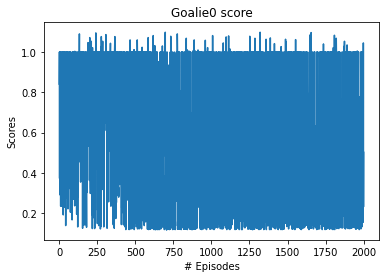

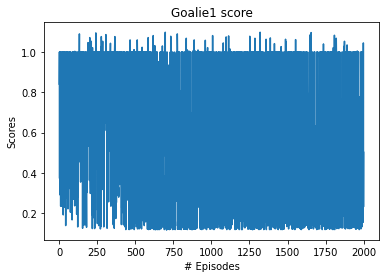

In [15]:
plot(g_scores,'Goalie0 score',0)

In [23]:
for i in range(6):                                         # play game for 2 episodes
    env_info = env.reset(train_mode=False)                 # reset the environment    
    g_states = env_info[g_brain_name].vector_observations  # get initial state (goalies)
    s_states = env_info[s_brain_name].vector_observations  # get initial state (strikers)
    g_scores = np.zeros(num_g_agents)                      # initialize the score (goalies)
    s_scores = np.zeros(num_s_agents)                      # initialize the score (strikers)
    while True:
        # select actions and send to environment
        g_actions = []
        for g_state, g_agent in zip(g_states,agents[0]):
            g_actions.append(g_agent.act(g_state))
        s_actions = []
        for s_state, s_agent in zip(s_states,agents[1]):
            s_actions.append(s_agent.act(s_state))
                             
        actions = dict(zip([g_brain_name, s_brain_name],[g_actions, s_actions]))
                           
                             
        env_info = env.step(actions)                       
        
        # get next states
        g_next_states = env_info[g_brain_name].vector_observations         
        s_next_states = env_info[s_brain_name].vector_observations
        
        # get reward and update scores
        g_rewards = env_info[g_brain_name].rewards  
        s_rewards = env_info[s_brain_name].rewards
        g_scores += g_rewards
        s_scores += s_rewards
        
        # check if episode finished
        done = np.any(env_info[g_brain_name].local_done)  
        
        # roll over states to next time step
        g_states = g_next_states
        s_states = s_next_states
        
        # exit loop if episode finished
        if done:                                           
            break
    print('Scores from episode {}: {} (goalies), {} (strikers)'.format(i+1, g_scores, s_scores))

Scores from episode 1: [-0.96833333  0.13166667] (goalies), [-0.13166667  0.96833333] (strikers)
Scores from episode 2: [1.00166669 1.00166669] (goalies), [-1.00166669 -1.00166669] (strikers)
Scores from episode 3: [1.00166669 1.00166669] (goalies), [-1.00166669 -1.00166669] (strikers)
Scores from episode 4: [1.00166669 1.00166669] (goalies), [-1.00166669 -1.00166669] (strikers)
Scores from episode 5: [ 0.48166668 -0.61833333] (goalies), [ 0.61833333 -0.48166668] (strikers)
Scores from episode 6: [ 0.21666666 -0.88333345] (goalies), [ 0.88333345 -0.21666666] (strikers)


In [24]:
env.close()